In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif']=['SimHei'] 
# plt.rcParams['axes.unicode_minus']=False

### 交叉表和透视表
- crosstab(data1, data2)
- pivot_table()

In [6]:
customer_info = pd.read_excel('./data/会员信息查询.xlsx')
# customer_order = pd.read_excel('./data/会员消费报表.xlsx')
# global_ = pd.read_excel('./data/全国销售订单数量表.xlsx')
# pd.read_excel('./data/门店信息表.XLSX')

In [7]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952714 entries, 0 to 952713
Data columns (total 12 columns):
会员卡号      952714 non-null object
会员等级      952714 non-null object
会员来源      952714 non-null object
注册时间      952714 non-null datetime64[ns]
所属店铺编码    952714 non-null object
门店店员编码    253828 non-null object
省份        264801 non-null object
城市        264758 non-null object
性别        952714 non-null object
生日        785590 non-null object
年齡        952705 non-null float64
生命级别      952714 non-null object
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 87.2+ MB


In [30]:
from datetime import datetime
# 按月统计会员的存量和增量
customer_info.loc[:, '注册年月'] = customer_info['注册时间'].apply(lambda x : x.strftime('%Y-%m'))
customer_info.head()

,会员卡号,会员等级,会员来源,注册时间,所属店铺编码,门店店员编码,省份,城市,性别,生日,年齡,生命级别,注册年月
0,BL6099033963550303769,黄金会员,线下扫码,2019-03-31 23:55:03.977,DPXX07,NaN,NaN,NaN,女,1975-04-04,43.0,活跃,2019-03
1,BL6099033963450303763,黄金会员,线下扫码,2019-03-31 23:45:03.005,DPXX07,NaN,NaN,NaN,女,1982-04-02,36.0,活跃,2019-03
2,BL6099033963464003767,白银会员,电商入口,2019-03-31 23:42:40.073,DPS00X,NaN,NaN,NaN,女,1988-08-13,30.0,沉睡,2019-03
3,BL6099033963460503766,黄金会员,线下扫码,2019-03-31 23:42:05.516,DPXX07,NaN,NaN,NaN,女,1993-11-24,25.0,活跃,2019-03
4,BL6099033963660603765,白银会员,电商入口,2019-03-31 23:26:02.402,DPS00X,NaN,NaN,NaN,女,1993-03-20,26.0,沉睡,2019-03


In [32]:
# 获取每月的会员量
month_count = customer_info.groupby('注册年月')[['会员卡号']].count()
month_count

,会员卡号
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165
2018-01,15531
2018-02,13798
2018-03,49320
2018-04,71699


In [33]:
# 改名为月增量，即每月新增的会员数量
month_count.columns = ['月增量']
month_count

,月增量
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165
2018-01,15531
2018-02,13798
2018-03,49320
2018-04,71699


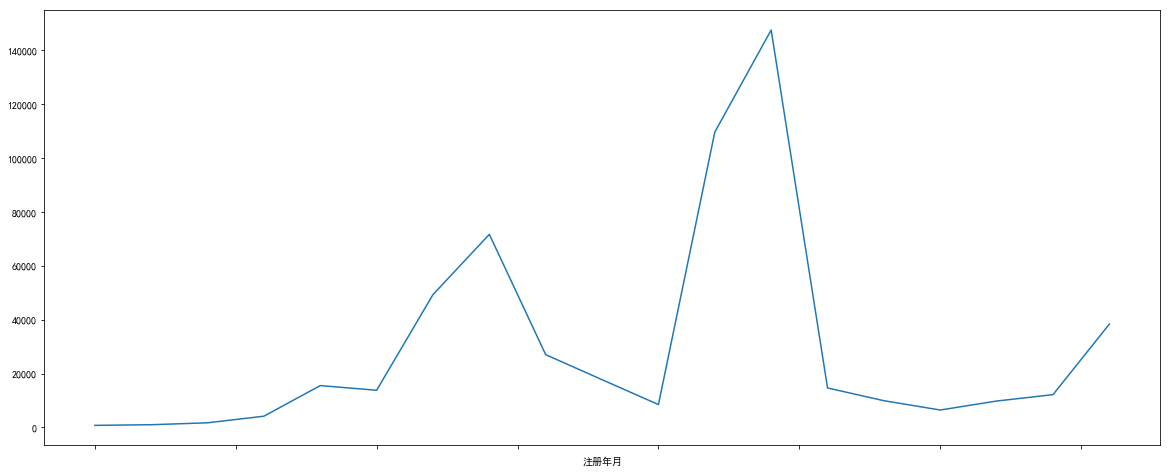

In [37]:
# 绘制走势图
month_count['月增量'][1:].plot(figsize=(20,8))
plt.show()

In [38]:
# 使用透视表 

# index：行索引，传入原属数据的列名
# columns：列索引，传入原始数据的列名
# values: 要做聚合操作的列名
# aggfunc: 聚合函数

#        会员卡号
# x年x月   count1
# ...     ...
customer_info.pivot_table(index='注册年月', values='会员卡号', aggfunc='count')

,会员卡号
注册年月,
2017-08,392910
2017-09,760
2017-10,996
2017-11,1710
2017-12,4165
2018-01,15531
2018-02,13798
2018-03,49320
2018-04,71699


In [39]:
# 累加和为现存量
month_count['会员存量'] = month_count['月增量'].cumsum()

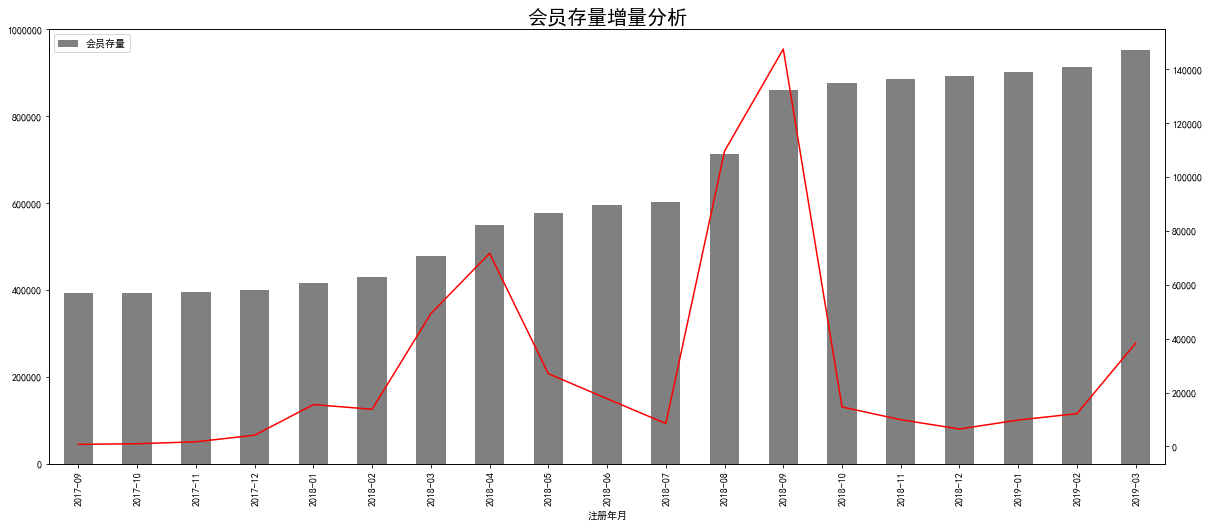

In [41]:
# 会员存量、增量分析
# 绘制月增量、存量；绘制到一起
month_count['月增量'].iloc[1:].plot(figsize=(20, 8), color='r', secondary_y=True)
# 存量绘制为柱状图
month_count['会员存量'].iloc[1:].plot(kind='bar', figsize=(20, 8), color='gray', legend=True)

plt.xlabel = '年月'
plt.ylabel = '会员存量'
plt.title('会员存量增量分析', fontsize=20)
plt.show()

In [42]:
# 统计月增量会员中的会员等级分布

In [43]:
customer_info.groupby(['注册年月', '会员等级'])['会员卡号'].count().unstack()

会员等级,白银会员,钻石会员,铂金会员,黄金会员
注册年月,,,,
2017-08,376648,185,387,15690
2017-09,530,3,10,217
2017-10,603,13,17,363
2017-11,1311,19,20,360
2017-12,3512,15,24,614
2018-01,11244,24,64,4199
2018-02,9937,9,34,3818
2018-03,41546,57,94,7623
2018-04,62613,48,83,8955


In [18]:
month_degree_count = customer_info.groupby(['注册年月', '会员等级'])[['会员卡号']].count()
month_degree_count

会员卡号
注册年月    会员等级        
2017-08 白银会员  376648
        钻石会员     185
        铂金会员     387
        黄金会员   15690
2017-09 白银会员     530
        钻石会员       3
        铂金会员      10
        黄金会员     217
2017-10 白银会员     603
        钻石会员      13
        铂金会员      17
        黄金会员     363
2017-11 白银会员    1311
        钻石会员      19
        铂金会员      20
        黄金会员     360
2017-12 白银会员    3512
        钻石会员      15
        铂金会员      24
        黄金会员     614
2018-01 白银会员   11244
        钻石会员      24
        铂金会员      64
        黄金会员    4199
2018-02 白银会员    9937
        钻石会员       9
        铂金会员      34
        黄金会员    3818
2018-03 白银会员   41546
        钻石会员      57
...              ...
2018-08 铂金会员      65
        黄金会员   13998
2018-09 白银会员  133090
        钻石会员      20
        铂金会员      63
        黄金会员   14412
2018-10 白银会员    9093
        钻石会员      15
        铂金会员      34
        黄金会员    5512
2018-11 白银会员    6313
        钻石会员       4
        铂金会员      29
        黄金会员    3566
2018-12 白银会员    2808
        钻石会员       3
        铂金会员      29
        黄金会员    3620
2019-01 白银会员    3661
        钻石会员       5
        铂金会员       9
        黄金会员    6120
2019-02 白银会员    4001
        钻石会员       5
        铂金会员      17
        黄金会员    8140
2019-03 白银会员   10580
        钻石会员       3
        铂金会员      37
        黄金会员   27752

[80 rows x 1 columns]

In [19]:
# 恢复成普通索引。
month_degree_count.reset_index()

,注册年月,会员等级,会员卡号
0,2017-08,白银会员,376648
1,2017-08,钻石会员,185
2,2017-08,铂金会员,387
3,2017-08,黄金会员,15690
4,2017-09,白银会员,530
5,2017-09,钻石会员,3
6,2017-09,铂金会员,10
7,2017-09,黄金会员,217
8,2017-10,白银会员,603
9,2017-10,钻石会员,13


In [20]:
# unstack不堆叠数据展示 这个效果与透视表相同
month_degree_count.unstack()

会员卡号                 
会员等级       白银会员 钻石会员 铂金会员   黄金会员
注册年月                            
2017-08  376648  185  387  15690
2017-09     530    3   10    217
2017-10     603   13   17    363
2017-11    1311   19   20    360
2017-12    3512   15   24    614
2018-01   11244   24   64   4199
2018-02    9937    9   34   3818
2018-03   41546   57   94   7623
2018-04   62613   48   83   8955
2018-05   19317   19   56   7617
2018-06   11292    7   23   6396
2018-07    3932    8   28   4515
2018-08   95584   27   65  13998
2018-09  133090   20   63  14412
2018-10    9093   15   34   5512
2018-11    6313    4   29   3566
2018-12    2808    3   29   3620
2019-01    3661    5    9   6120
2019-02    4001    5   17   8140
2019-03   10580    3   37  27752

In [21]:
# 使用透视表实现
member_rating = customer_info.pivot_table(index='注册年月', columns='会员等级', values='会员卡号', aggfunc='count')
member_rating

会员等级,白银会员,钻石会员,铂金会员,黄金会员
注册年月,,,,
2017-08,376648,185,387,15690
2017-09,530,3,10,217
2017-10,603,13,17,363
2017-11,1311,19,20,360
2017-12,3512,15,24,614
2018-01,11244,24,64,4199
2018-02,9937,9,34,3818
2018-03,41546,57,94,7623
2018-04,62613,48,83,8955


In [22]:
member_rating = member_rating[1:]

In [23]:
member_rating

会员等级,白银会员,钻石会员,铂金会员,黄金会员
注册年月,,,,
2017-09,530,3,10,217
2017-10,603,13,17,363
2017-11,1311,19,20,360
2017-12,3512,15,24,614
2018-01,11244,24,64,4199
2018-02,9937,9,34,3818
2018-03,41546,57,94,7623
2018-04,62613,48,83,8955
2018-05,19317,19,56,7617


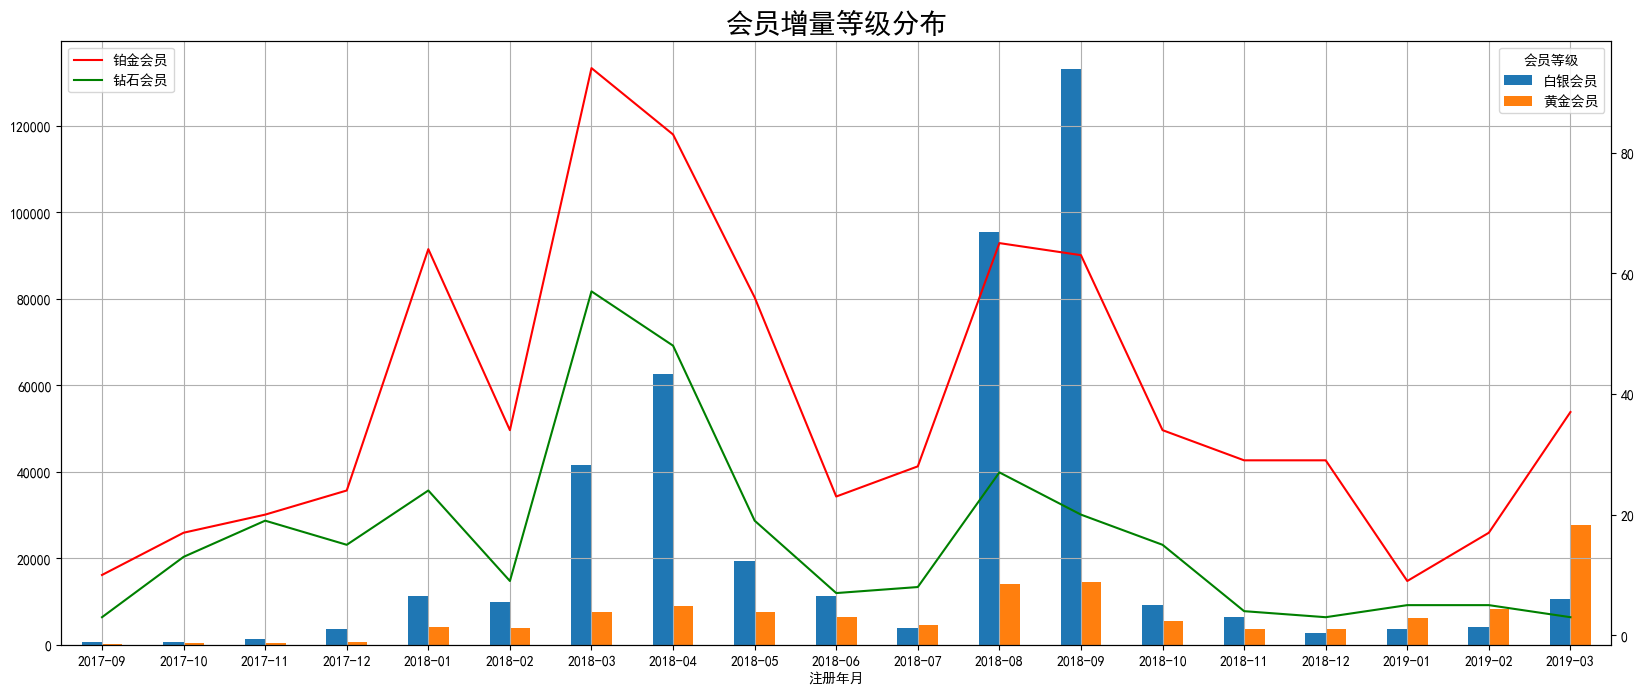

In [44]:
# 增量等级分布
# 绘制图表
fig, ax1 = plt.subplots(figsize=(20, 8), dpi=100)
# 构建双胞胎坐标系
ax2 = ax1.twinx()

member_rating[['白银会员', '黄金会员']].plot.bar(ax=ax1, rot=0, grid=True, legend=True)
member_rating[['铂金会员', '钻石会员']].plot(ax=ax2, color=['r','g'])

ax1.xlabel = '年月'
ax1.ylabel = '白银黄金'
ax2.ylabel = '铂金钻石'
ax2.legend(loc='upper left')

plt.title('会员增量等级分布', fontsize=20)

plt.show()

In [45]:
# 增量等级占比

member_rating['总计'] = member_rating.sum(axis='columns')
member_rating['白银会员占比'] = member_rating['白银会员'].div(member_rating['总计'])
member_rating['黄精会员占比'] = member_rating['黄金会员'].div(member_rating['总计'])
member_rating

/home/duchao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/duchao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/duchao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

会员等级,白银会员,钻石会员,铂金会员,黄金会员,总计,白银会员占比,黄精会员占比
注册年月,,,,,,,
2017-09,530,3,10,217,1520.982895,0.348459,0.142671
2017-10,603,13,17,363,1992.969880,0.302564,0.182140
2017-11,1311,19,20,360,3420.977193,0.383224,0.105233
2017-12,3512,15,24,614,8330.990636,0.421559,0.073701
2018-01,11244,24,64,4199,31062.994334,0.361974,0.135177
2018-02,9937,9,34,3818,27596.996884,0.360075,0.138348
2018-03,41546,57,94,7623,98640.996938,0.421184,0.077280
2018-04,62613,48,83,8955,143398.998173,0.436635,0.062448
2018-05,19317,19,56,7617,54018.997223,0.357596,0.141006


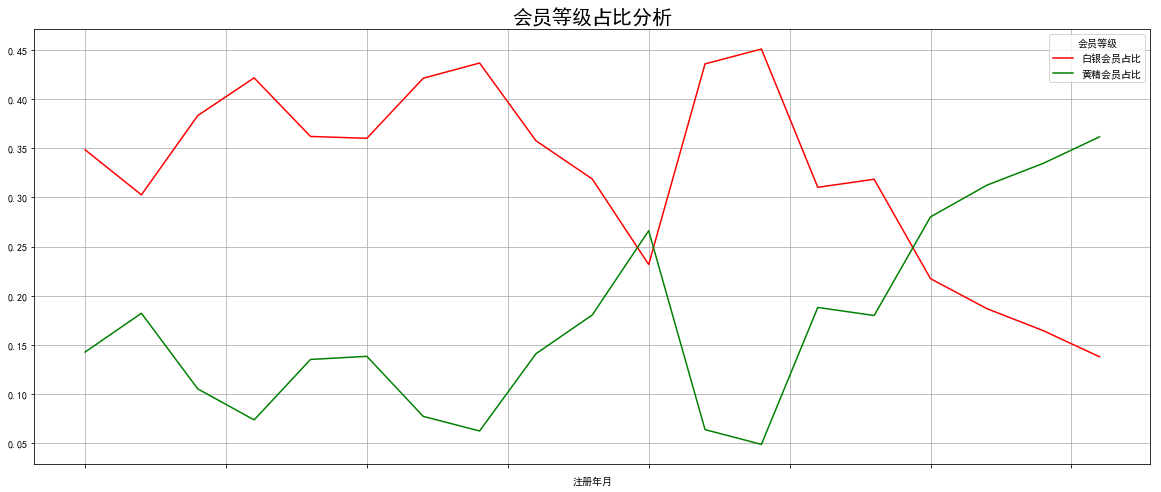

In [46]:
# 绘图
member_rating[['白银会员占比', '黄精会员占比']].plot(color=['r','g'], figsize=(20, 8), grid=True)
plt.ylabel = '占比'
plt.title('会员等级占比分析', fontsize=20)
plt.show()

In [47]:
# 整体等级分布